In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# load the processed data
df = pd.read_csv("../data/processed_data.csv")
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI_Category
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,22.96,Normal weight
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,22.58,Normal weight
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,24.69,Normal weight
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,24.41,Normal weight
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,22.14,Normal weight


In [ ]:
# Load necessary libraries for preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# -----------------------------
# Target and features
# -----------------------------
X = df.drop(columns=["Calories"])
y = df["Calories"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Column identification
# -----------------------------
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(
    include=["object", "category"]
).columns.tolist()

ordinal_features = ["BMI_Category"]
onehot_features = ["Sex"]

# Remove explicitly handled categorical columns from generic categorical list
categorical_features = list(
    set(categorical_features) - set(ordinal_features) - set(onehot_features)
)

# -----------------------------
# Transformers
# -----------------------------
numeric_transformer = StandardScaler()

onehot_transformer = OneHotEncoder(
    handle_unknown="ignore", drop="first", sparse_output=False
)

ordinal_transformer = OrdinalEncoder(
    categories=[["Underweight", "Normal weight", "Overweight", "Obesity"]]
)

# -----------------------------
# Preprocessor
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ord", ordinal_transformer, ordinal_features),
        ("oh", onehot_transformer, onehot_features),
    ],
    remainder="passthrough",
)

In [4]:
# Fit ONLY on training data
preprocessor.fit(X_train)

# Transform train and test separately
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [6]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
## Model Training
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor": AdaBoostRegressor(),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_processed, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test_processed)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(
        y_train, y_train_pred
    )

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------")

    print("Model performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print("=" * 35)
    print("\n")# Based on the results, Random Forest Regressor seems to perform the best on the test set.

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10.9147
- Mean Absolute Error: 7.9415
- R2 Score: 0.9694
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.8668
- Mean Absolute Error: 7.9233
- R2 Score: 0.9695


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.0752
- Mean Absolute Error: 2.7401
- R2 Score: 0.9957
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9597
- Mean Absolute Error: 3.3351
- R2 Score: 0.9937


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.1963
- Mean Absolute Error: 0.0147
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.1597
- Mean Absolute Error: 3.1230
- R2 Score: 0.9931


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1.4402
- Mean Absolute Error: 0.8588
- R2 Score: 0.

### Predicted vs Actual Performance Index Visualisation

In [ ]:
model_predictions = {}

for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    model_predictions[name] = y_pred

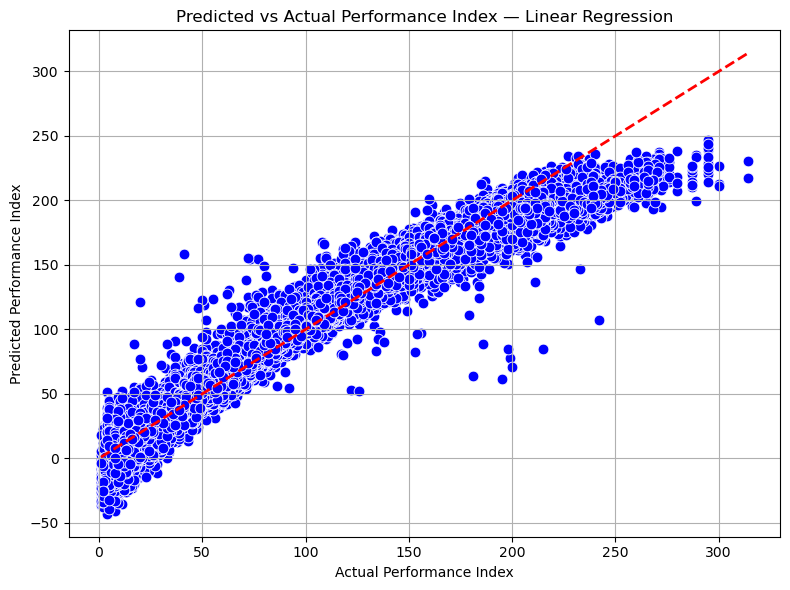

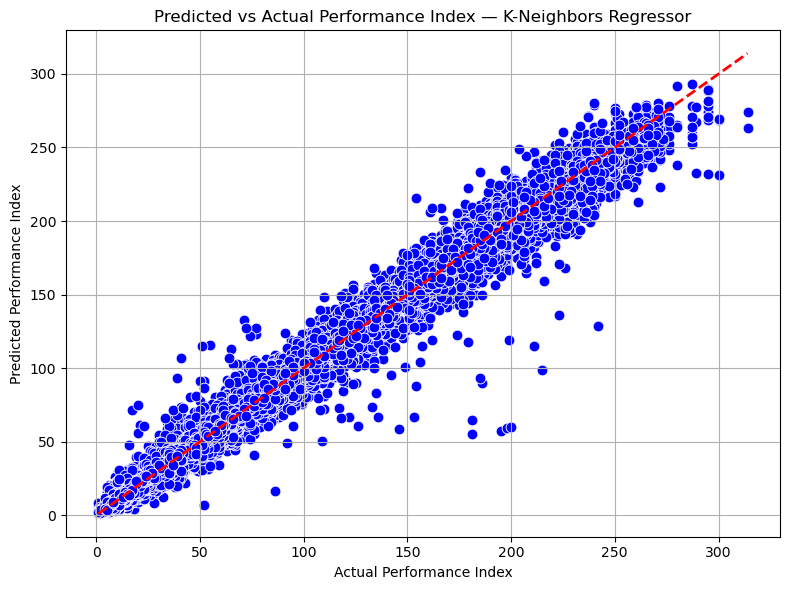

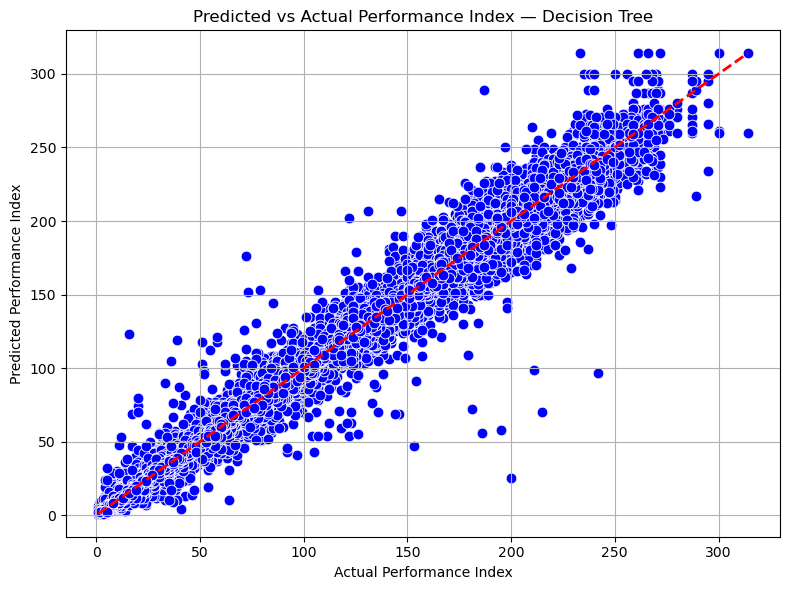

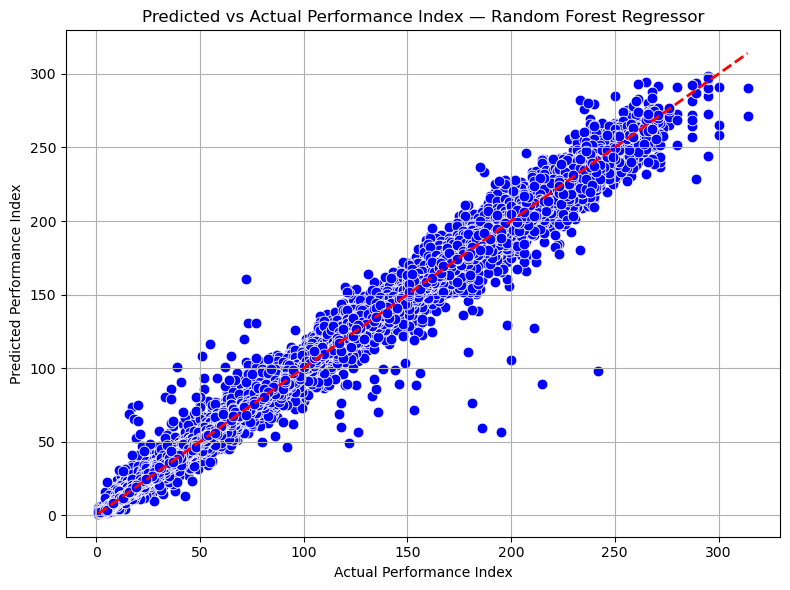

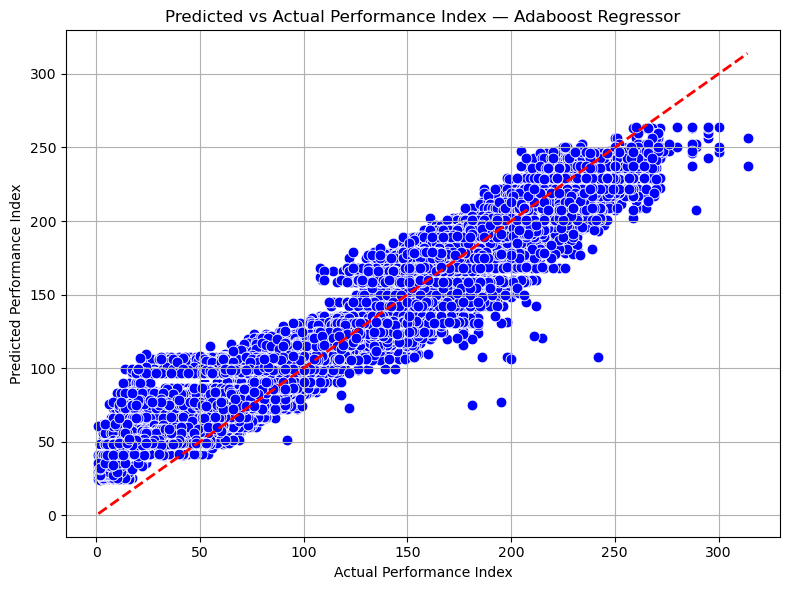

In [9]:
for name, y_pred in model_predictions.items():

    plt.figure(figsize=(8, 6))

    # Scatter plot
    sns.scatterplot(x=y_test, y=y_pred, s=60, color="blue")

    # 45-degree reference line
    plt.plot(
        [min(y_test), max(y_test)],
        [min(y_test), max(y_test)],
        color="red",
        linestyle="--",
        linewidth=2,
    )

    plt.xlabel("Actual Performance Index")
    plt.ylabel("Predicted Performance Index")
    plt.title(f"Predicted vs Actual Performance Index — {name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Residuals vs Predicted Values Visualisation

In [10]:
# model residual calculation

model_residuals = {}

for name, y_pred in model_predictions.items():
    residuals = y_test - y_pred
    model_residuals[name] = residuals

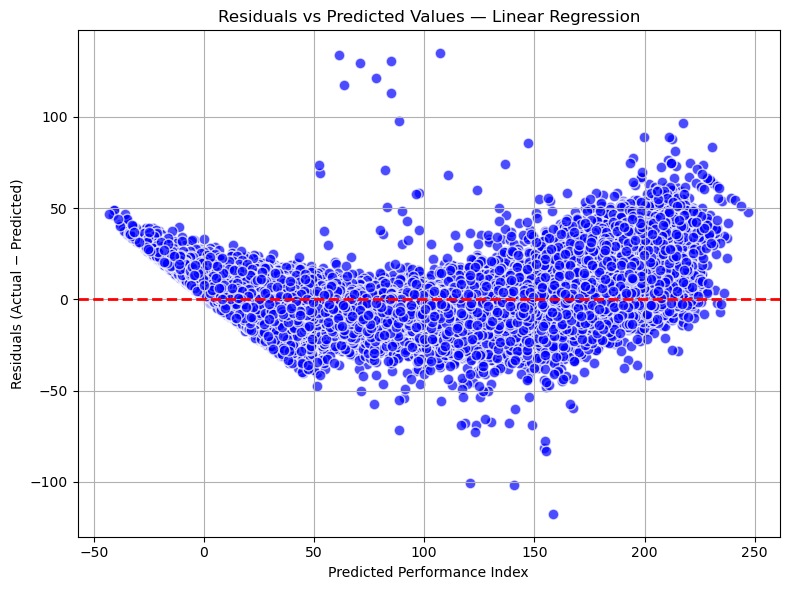

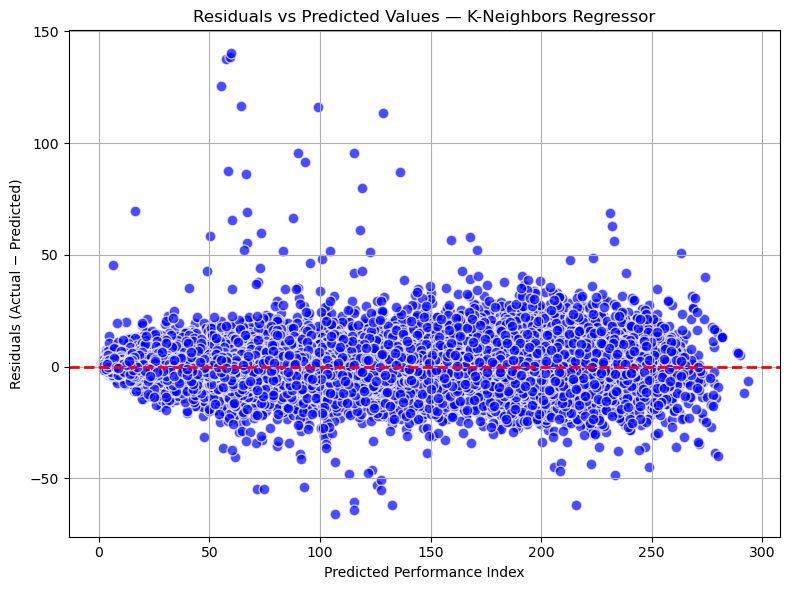

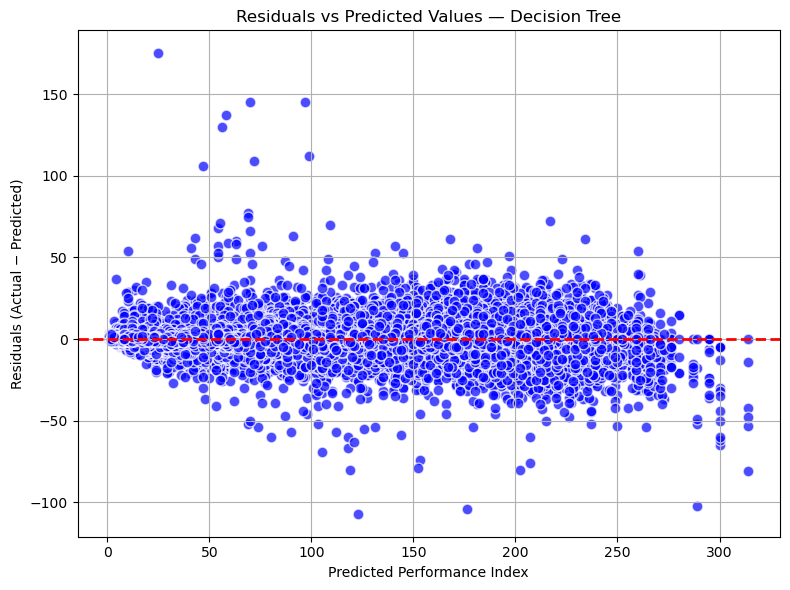

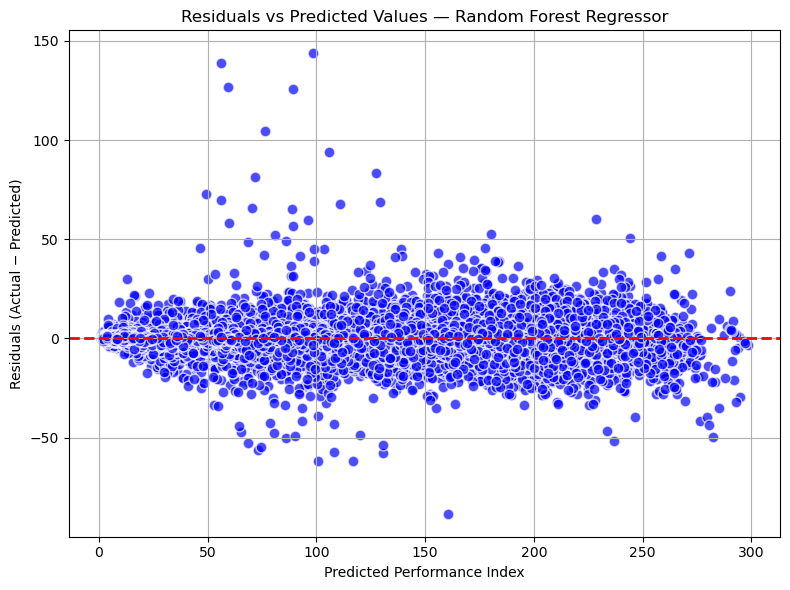

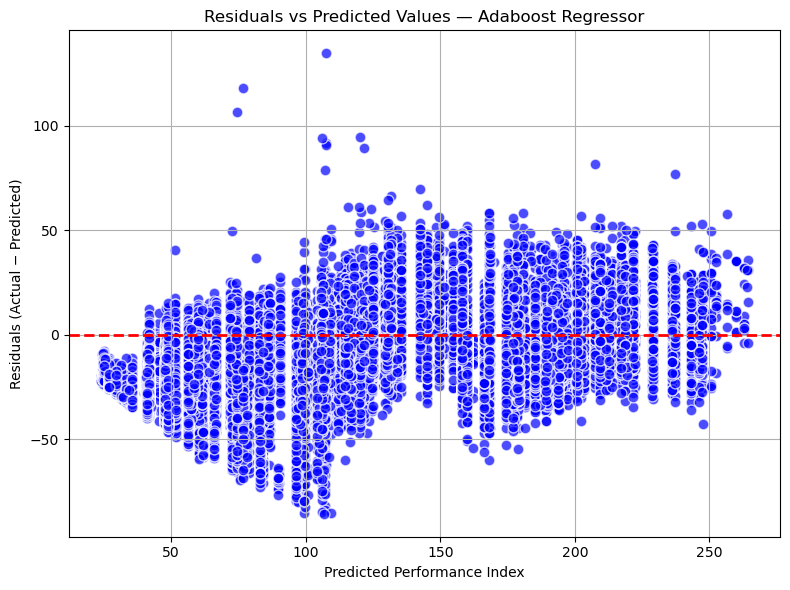

In [11]:
for name in model_predictions.keys():

    y_pred = model_predictions[name]
    residuals = model_residuals[name]

    plt.figure(figsize=(8, 6))

    plt.scatter(y_pred, residuals, s=60, alpha=0.7, color="blue", edgecolor="w")

    # Zero residual reference line
    plt.axhline(0, linestyle="--", linewidth=2, color="red")

    plt.xlabel("Predicted Performance Index")
    plt.ylabel("Residuals (Actual − Predicted)")
    plt.title(f"Residuals vs Predicted Values — {name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Model Selection

### Ranking Model by Residual Spread 

In [12]:
graph_score = {}

for name, y_pred in model_predictions.items():
    residuals = y_test - y_pred
    # Combine metrics for visual closeness: lower spread = better
    score = np.std(residuals)  # standard deviation of residuals
    graph_score[name] = score

print("Ranking by Residual Spread (lower is better):")
for name, score in sorted(graph_score.items(), key=lambda x: x[1]):
    print(f"{name}: Residual std = {score:.4f}")

Ranking by Residual Spread (lower is better):
Random Forest Regressor: Residual std = 3.8113
K-Neighbors Regressor: Residual std = 4.9597
Decision Tree: Residual std = 5.1597
Linear Regression: Residual std = 10.8668
Adaboost Regressor: Residual std = 15.5811


### Ranking Model by Evaluation Metrices

In [13]:
# Store metrics for ranking
model_metrics = {}

for name, model in models.items():
    y_pred = model.predict(X_test_processed)

    mae, rmse, r2 = evaluate_model(y_test, y_pred)  # Your existing function
    model_metrics[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# Convert to sorted lists
print("Ranking by RMSE (lower is better):")
for name, metrics in sorted(model_metrics.items(), key=lambda x: x[1]["RMSE"]):
    print(
        f"{name}: RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, R2={metrics['R2']:.4f}"
    )

print("\nRanking by R2 (higher is better):")
for name, metrics in sorted(
    model_metrics.items(), key=lambda x: x[1]["R2"], reverse=True
):
    print(
        f"{name}: R2={metrics['R2']:.4f}, RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}"
    )

Ranking by RMSE (lower is better):
Random Forest Regressor: RMSE=3.8113, MAE=2.3018, R2=0.9963
K-Neighbors Regressor: RMSE=4.9597, MAE=3.3351, R2=0.9937
Decision Tree: RMSE=5.1597, MAE=3.1230, R2=0.9931
Linear Regression: RMSE=10.8668, MAE=7.9233, R2=0.9695
Adaboost Regressor: RMSE=19.4849, MAE=15.7561, R2=0.9020

Ranking by R2 (higher is better):
Random Forest Regressor: R2=0.9963, RMSE=3.8113, MAE=2.3018
K-Neighbors Regressor: R2=0.9937, RMSE=4.9597, MAE=3.3351
Decision Tree: R2=0.9931, RMSE=5.1597, MAE=3.1230
Linear Regression: R2=0.9695, RMSE=10.8668, MAE=7.9233
Adaboost Regressor: R2=0.9020, RMSE=19.4849, MAE=15.7561


#### Conclusion on Model Selection
*Based on both ranking approaches—residual spread analysis and evaluation metrics—the Random Forest model demonstrates superior performance. It not only achieves stronger predictive accuracy compared to linear models but also captures non-linear patterns present in the data that linear approaches fail to model effectively.*

*As a result, Random Forest was selected as the final model due to its robustness, ability to handle variability, and improved generalization performance.*

## Model Explainability

In [14]:
best_model_name = "Random Forest Regressor"
best_model = models[best_model_name]

In [15]:
import shap

X_bg = X_train_processed[:100]   # small background

explainer = shap.Explainer(
    best_model.predict,   # ✅ callable
    X_bg
)

X_exp = X_test_processed[:200]
shap_values = explainer(X_exp)


ExactExplainer explainer: 201it [12:07,  3.64s/it]                         


In [16]:
shap_values.shape


(200, 9)

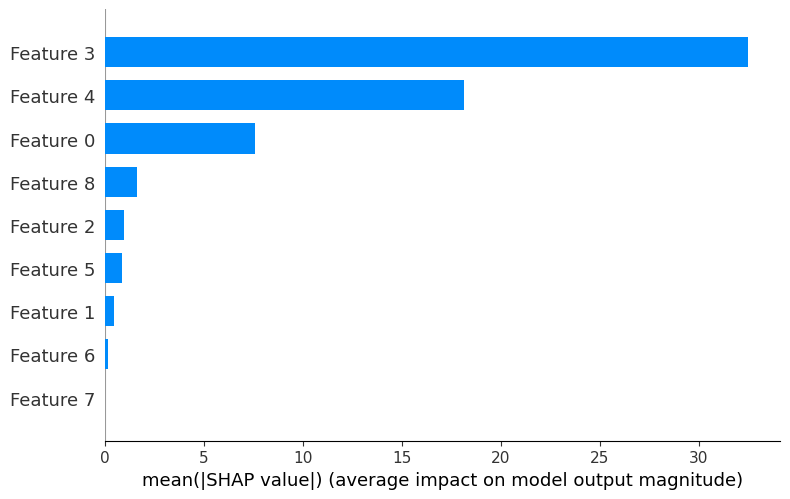

In [23]:
shap.summary_plot(
    shap_values,
    X_exp,
    plot_type="bar"
)


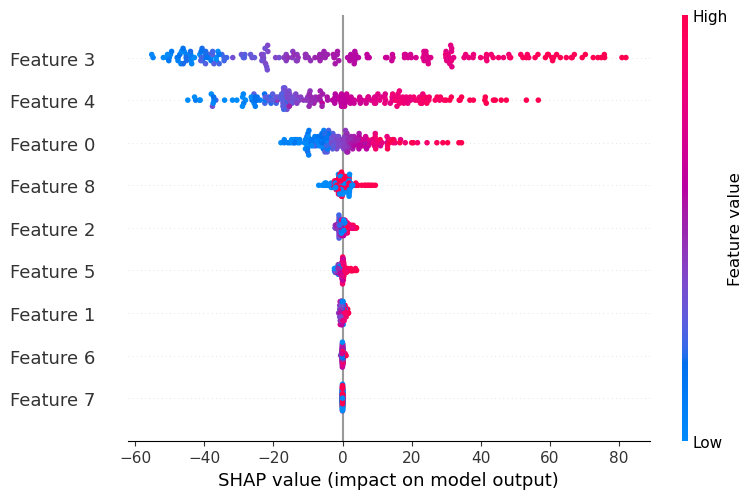

In [18]:
shap.summary_plot(
    shap_values,
    X_exp
)


Conclusion on Model Explainability (SHAP Analysis)

The SHAP analysis reveals that Feature 3 (Duration) is the most influential driver of the model’s predictions, followed by Feature 4 (Heart Rate) and Feature 0 (Age). These features exhibit the highest mean absolute SHAP values, indicating that they contribute the most to the model’s output across observations.The SHAP summary plot further shows a clear directional relationship for the top features: higher feature values (shown in red) generally push the predictions upward, while lower values (shown in blue) reduce the predicted outcome. This demonstrates that the model is capturing meaningful, non-linear relationships rather than relying on noise.

Features such as Feature 8, Feature 2, and Feature 5 have a moderate influence, while the remaining features contribute minimally to the model’s predictions. This suggests that the model effectively prioritizes the most informative variables while reducing reliance on less impactful ones.

Overall, the SHAP results confirm that the selected Random Forest model is both accurate and interpretable, with predictions driven by a small set of key features in a consistent and explainable manner. This enhances trust in the model’s decisions and supports its suitability for real-world deployment.

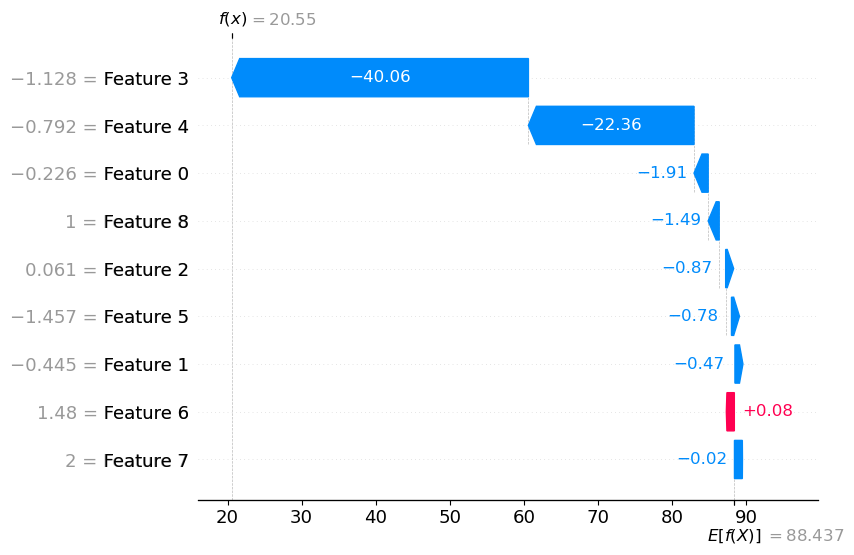

In [24]:
i = 11  # any index
shap.plots.waterfall(shap_values[i])


In [ ]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__Age', 'num__Height', 'num__Weight', 'num__Duration',
       'num__Heart_Rate', 'num__Body_Temp', 'num__BMI',
       'ord__BMI_Category', 'oh__Sex_male'], dtype=object)